# 📉 Telco Customer Churn Analysis & Strategy Development
#### 👩‍💻 Author: Ayesha Amer  

---

## 🧠 Project Goal

The goal of this project is to **analyze customer churn behavior** and help the business/marketing teams:
- Understand **why different types of customers leave**
- Identify **high-risk customer clusters**
- Develop **targeted retention strategies** to prevent churn

Rather than treating all customers the same, we aim to **segment them into behavioral groups** and analyze how churn varies across these clusters.

---

## 📌 Problem Statement

**Why do different telecom customers churn — and how can we stop them from leaving?**

Telecom companies face huge losses when customers churn. If we can uncover patterns in customer behavior and reasons for leaving, the company can **design smarter loyalty, pricing, or support programs**.

---

## 📊 Objectives

- Understand customer demographics, services, and behavior
- Perform exploratory data analysis to identify churn trends
- Use clustering to segment customer types
- Provide actionable insights for marketing & retention teams


In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# pandas setting to so that all columns are displayed whenever a function like .head or .info is called
pd.set_option ("display.max_columns",None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# seaborn setting to gioves plot a clean look
sns.set(style = "whitegrid")

### Data Loading

In [4]:
# Loading the datasetimport pandas as pd
file_path = r"C:\Users\Admin\Documents\Summer\Project 1\Datasets\archive\Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

In [5]:
# Printing first 10 rows to verify successful loading of the dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Data Cleaning and Preprocessing

In [6]:
# Summary of Dataset's structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### All column data types are correct except for TotalCharges, which is currently an object. Since it should be numeric, we first need change the column type to float or int.

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [8]:
# Checking if any missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### There are 11 missing values in the TotalCharges column, which is very few compared to the total of 7043 rows, so we will simply drop them.

In [9]:
df = df.dropna(subset = ["TotalCharges"])

In [10]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2088,6784-XYJAE,Female,0,No,No,36,Yes,Yes,DSL,No,No,Yes,No,No,No,One year,No,Electronic check,55.80,1941.50,No


In [11]:
# Checking for Duplicate Values
print(df.duplicated().sum())

0


##### Since there are no duplicate rows in the dataset, we can now safely drop the customerID column as it no longer serves a purpose

In [12]:
# Dropping Customer-ID as it will not help in any analysis
df.drop("customerID", axis=1, inplace=True)

### Checking Outliers

In [13]:
#Defining the function to find any possible outliers

def detect_outliers(df,col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    Lower_Bound = Q1 - 1.5*IQR
    Upper_Bound = Q3 + 1.5*IQR
    outliers = df[(df[col_name] < Lower_Bound) | (df[col_name] > Upper_Bound)]
    return outliers
    

In [14]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in cols:
    outliers = detect_outliers(df,i)
    print(i," : ",len(outliers))

tenure  :  0
MonthlyCharges  :  0
TotalCharges  :  0


### Saving the Clean Version of the File

In [15]:
df.to_csv("clean_telco_data.csv", index=False)

### Univariate Analysis

In [16]:
# List of all numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
#List of all categorical columns
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 
]
#Renaming values for Paymentmethod
df['PaymentMethod'] = df['PaymentMethod'].replace({
    'Bank transfer (automatic)': 'Bank Transfer',
    'Credit card (automatic)': 'Credit Card',
    'Electronic check': 'E-Check',
    'Mailed check': 'Mailed Check'
})


### Statistical Summary of Numerical Columns

In [17]:
def draw_hist(df, column):
    sns.histplot(data=df, x=column, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

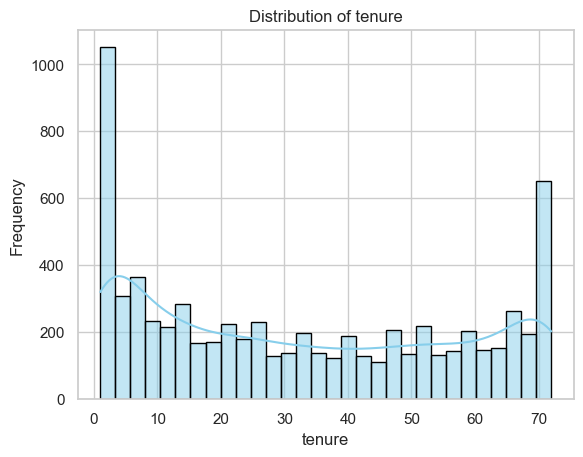

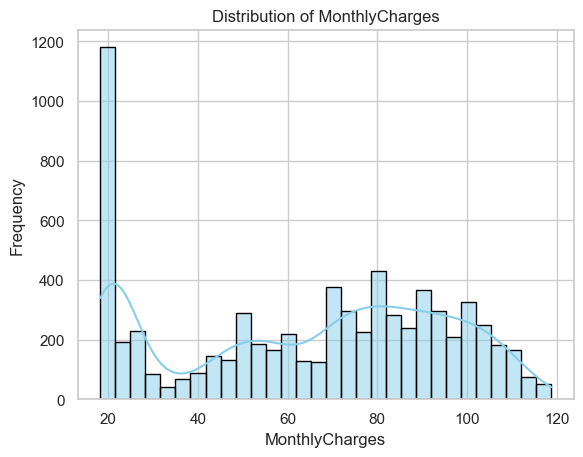

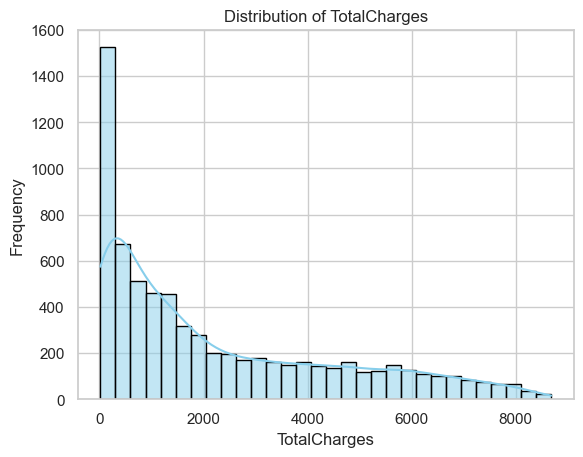

In [18]:
# Statistical Summary of Numerical Columns
for i in numerical_cols:
    draw_hist(df,i)
    print("\n\n")

#### Summary of the Numerical Univariate Analysis 

##### Tenure
- The data shows a **bimodal distribution**.
- Many customers **leave early** (within 0–5 months).
- A significant number of customers also **stay for a long period** (around 70–80 months).
- This suggests that while some customers **churn early**, others are **loyal long-term users**.

##### Monthly Charges
- Most customers pay **low monthly charges**, typically around **20–30**, as seen from the main peak in the distribution.
- Fewer customers pay **higher charges** (above 60), and those values are more spread out with no strong second peak.

##### Total Charges
- The distribution of TotalCharges is **right-skewed**, with most customers having **low total charges**.
- Since TotalCharges is a product of tenure and monthly charges, low values often indicate customers who have **recently joined** or **left early**.


### Statistical Summary of Categorical Columns

In [19]:
def draw_barplot(df,column):
    sns.countplot(x=column, data=df)
    plt.title(column.upper())
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


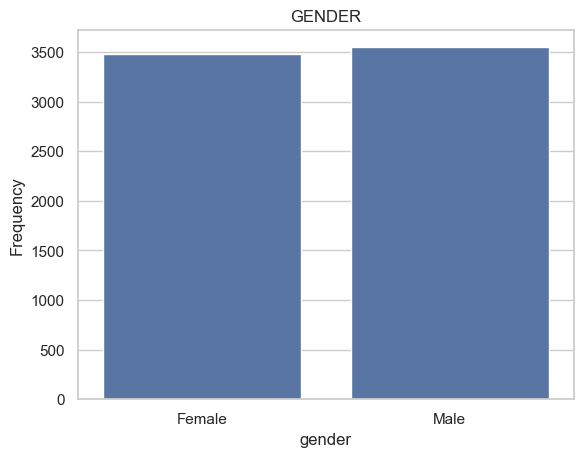

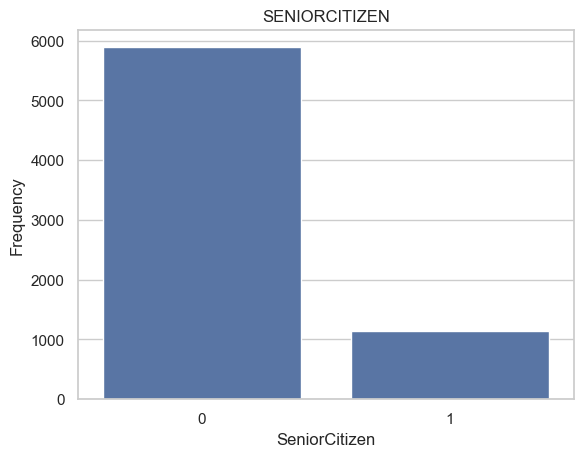

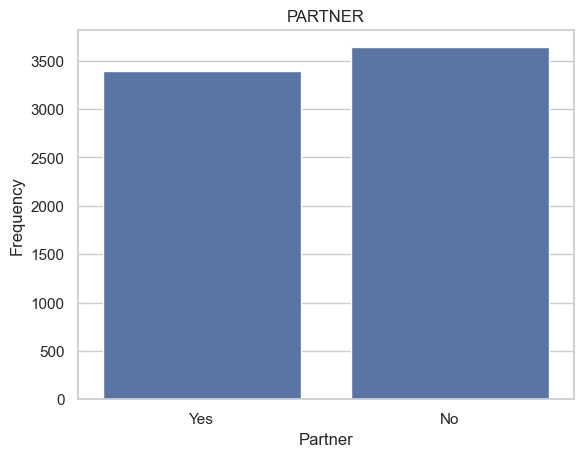

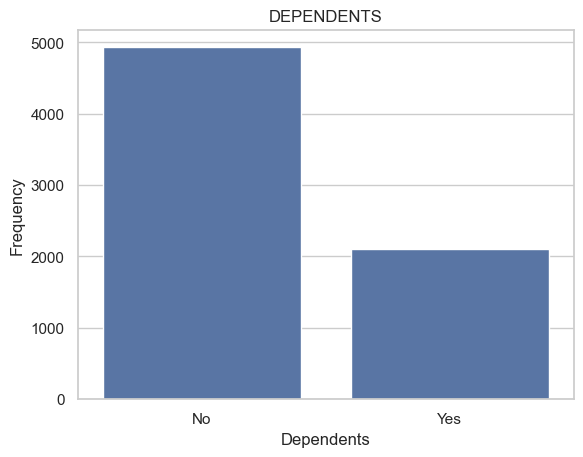

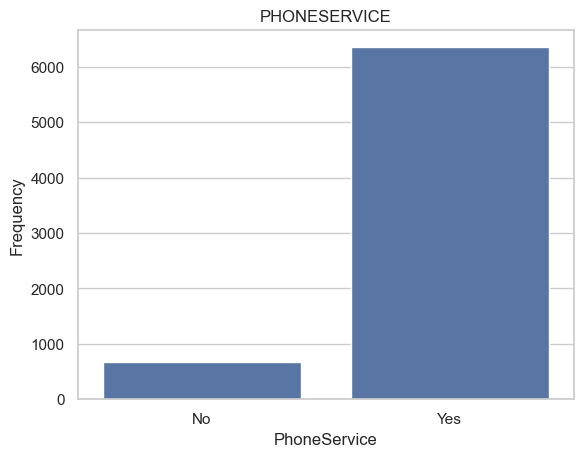

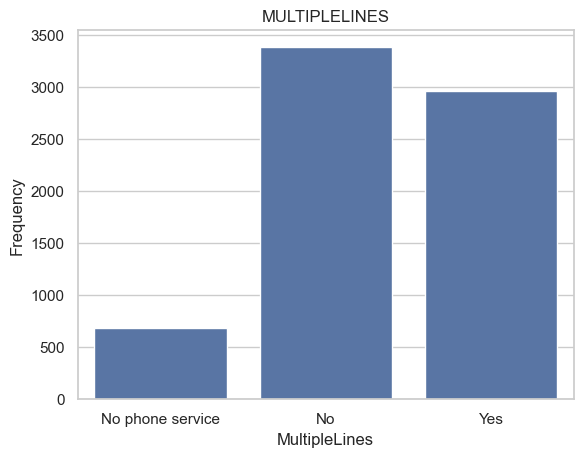

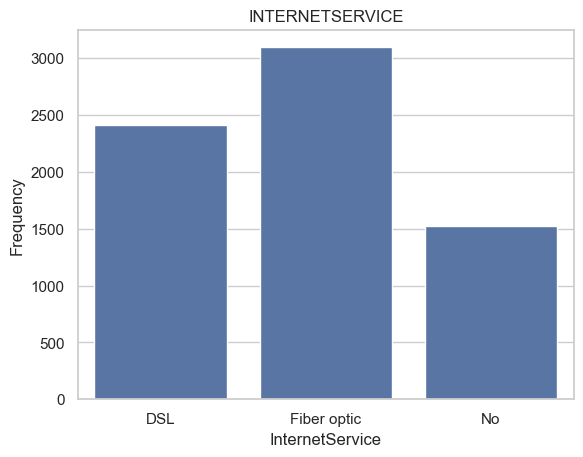

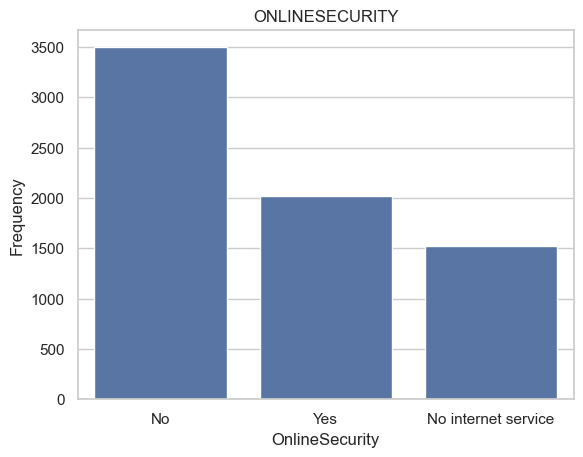

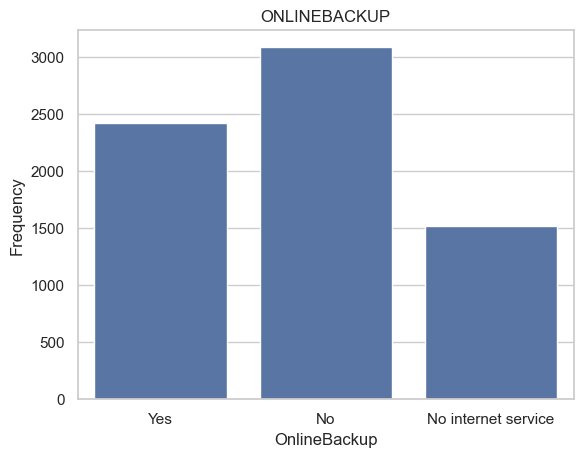

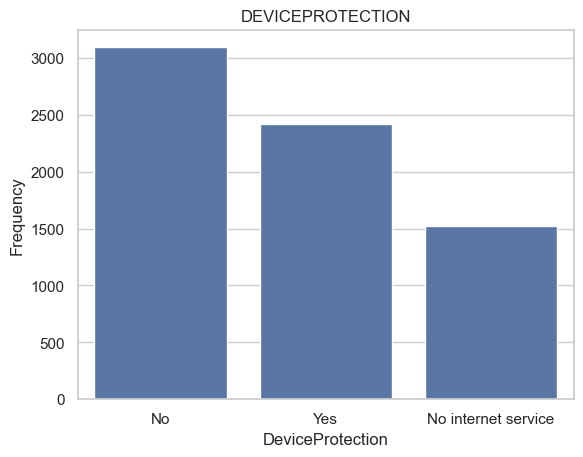

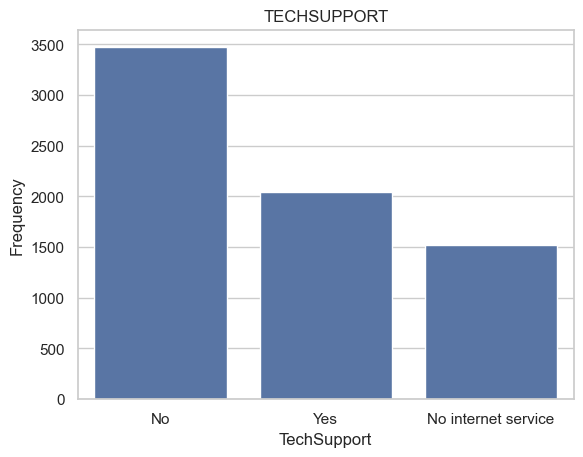

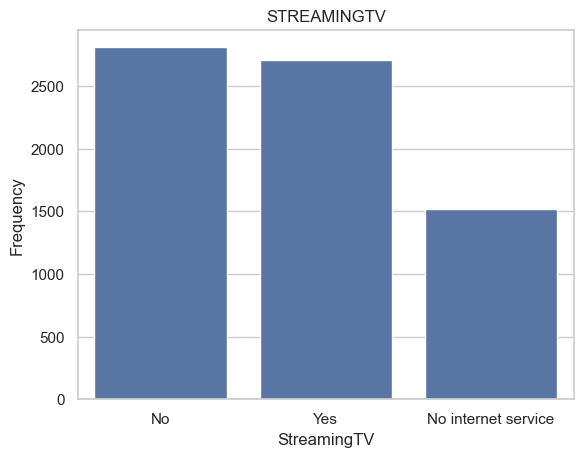

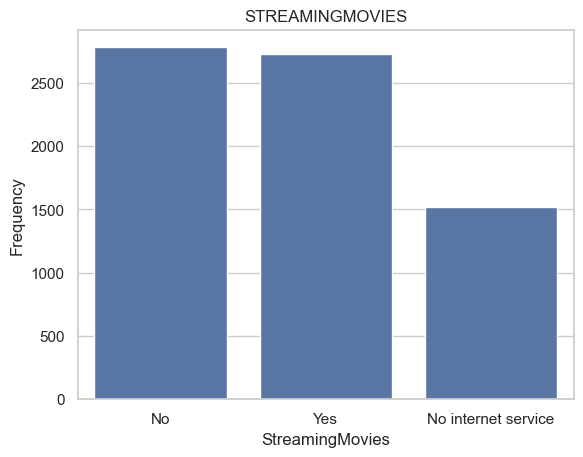

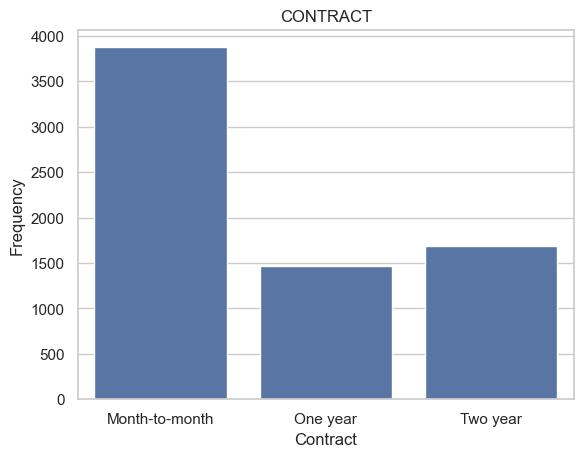

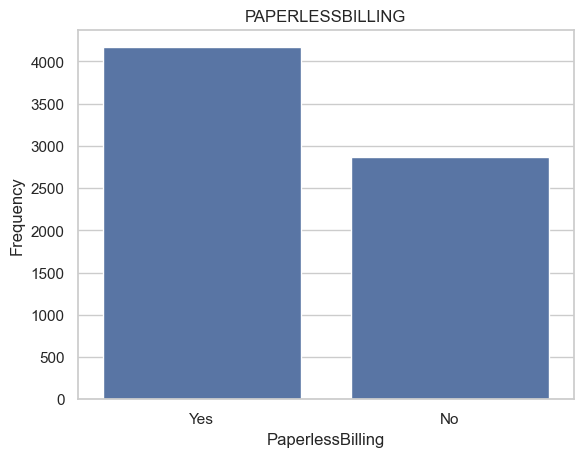

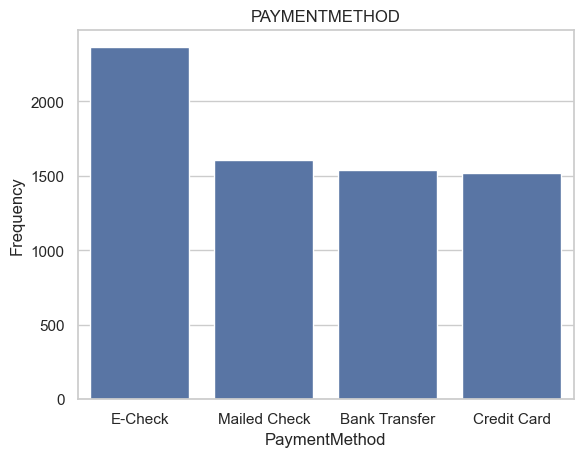

In [20]:
# Statistical Summary of Categorical Columns
for i in categorical_cols:
    draw_barplot(df,i)
    print("\n\n")

#### Summary of Categorical Univariate Analysis

**🔹 Gender**
- Male and female customers are almost **evenly split** (~3500 each).
- No significant gender imbalance is observed.

**🔹 Senior Citizen**
- Majority of customers (**~5800**) are **not senior citizens**, while a smaller portion are seniors.

**🔹 Partner**
- Around **3400 customers have a partner**, while **3700 do not**.

**🔹 Dependents**
- Most customers (**~4900**) **do not have dependents**, compared to **~2100 who do**.

**🔹 Phone Service**
- A large majority (**~6200**) have phone service; about **700 do not**.

**🔹 Multiple Lines**
- ~2900 customers have multiple lines  
- ~3300 do not  
- ~700 have **no phone service**, so this feature doesn’t apply to them.

**🔹 Internet Service**
- ~2400 use **DSL**  
- ~3100 use **Fiber optic**  
- ~1500 have **no internet service**

**🔹 Online Security**
- ~3500 customers **do not have** online security  
- ~2000 **do have it**  
- ~1500 are not applicable (no internet service)

**🔹 Online Backup**
- ~3100 customers **do not have** online backup  
- ~2400 **do have it**  
- ~1500 have no internet service

**🔹 Device Protection**
- ~3100 customers **do not have** device protection  
- ~2400 **do have it**  
- ~1500 have no internet service

**🔹 Tech Support**
- ~3400 customers **do not have** tech support  
- ~2000 **do have it**  
- ~1500 have no internet service

**🔹 Streaming TV**
- ~2800 customers **use** streaming TV  
- ~2600 **do not**  
- ~1500 have no internet service

**🔹 Streaming Movies**
- Similar to Streaming TV:  
  ~2800 **have it**, ~2600 **do not**, ~1500 have no internet

**🔹 Contract Type**
- ~3800 are on **Month-to-Month** contracts  
- ~1400 are on **One-Year**  
- ~1600 are on **Two-Year** contracts

**🔹 Paperless Billing**
- ~4100 customers **use paperless billing**  
- ~2700 do not

**🔹 Payment Method**
- ~2300 use **Electronic check**  
- ~1600 use **Mailed check**  
- ~1550 use **Bank transfer (auto)**  
- ~1500 use **Credit card (auto)**

---



### Bivariate Analysis

##### Numerical Variables vs Churn

In [21]:
def num_bivariate(df,column):
    sns.boxplot(data=df, x='Churn', y=column)
    plt.xlabel ('Churn')
    plt.ylabel (column)
    plt.title(f'{column} distribution by Churn')
    plt.show()

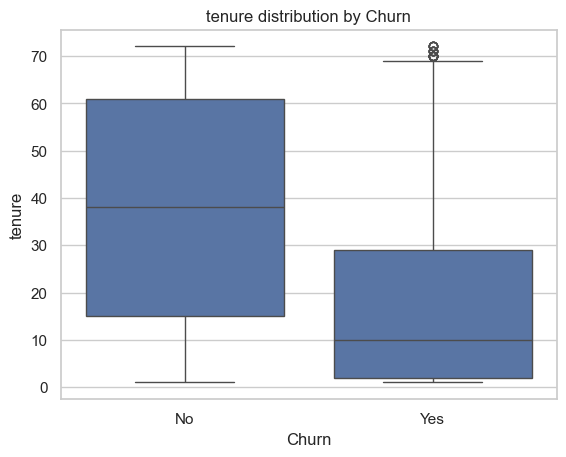

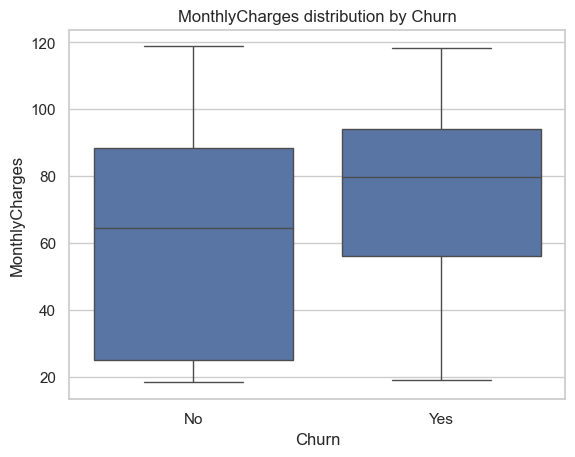

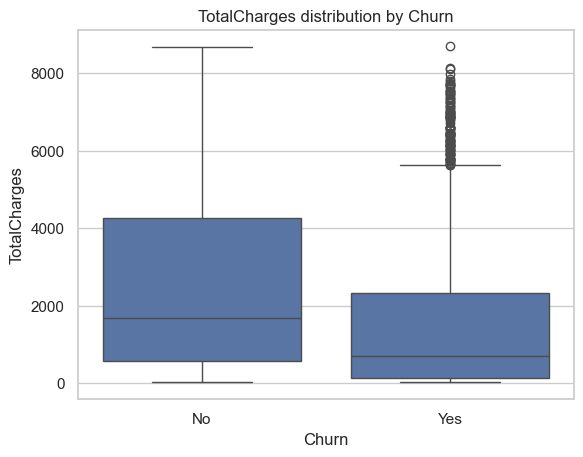

In [22]:
for i in numerical_cols:
    num_bivariate(df,i)
    print("\n\n")

### Bivariate Analysis:

#### Tenure vs Churn

- The **median tenure** for churned customers is **10 months**, while for non-churned customers, it is **38 months**.
- The **whiskers** extend to **69 months** for churned and **72 months** for non-churned customers.
- A few **outliers are present** for churned customers who stayed longer but still left the service.

#### Insight:
Most customers who churn do so early (within their first year).  
However, the presence of **long-tenure churners** shows that even loyal customers are at risk, highlighting the importance of **long-term retention strategies**.

#### MonthlyCharges vs Churn

- The **median monthly charge** for churned customers is **80**, while for non-churned customers, it is **65**.
- The **IQR** (box range) for churned customers is **58–92**, and for non-churned, it is **25–85**.
- There are **no significant outliers**, indicating that the distribution is fairly consistent.

#### Insight:
Customers who churn tend to have **higher monthly charges** on average.  
This suggests that pricing could be a factor in churn, and **value perception** among higher-paying customers should be assessed.

#### TotalCharges vs Churn

- The **median total charge** for churned customers is **5700**, while for non-churned customers it is **9000**.
- The **box range** for churned customers is **0–2200**, and for non-churned it is **1000–4300**.
- There are **many outliers** in the churned group, meaning some customers who churned had **very high total charges**.

#### Insight:
Most churned customers had low total charges due to short tenures.  
However, the presence of **high-value churners (outliers)** indicates the risk of losing customers who have already paid a lot — making churn **even more costly** for the business.


#### Categorical Variables vs Churn

In [23]:
def cat_bivariate(df,column):
    sns.countplot(data = df, x=column, hue='Churn')
    plt.title(f'{column} vs Churn (Counts)')
    plt.show()

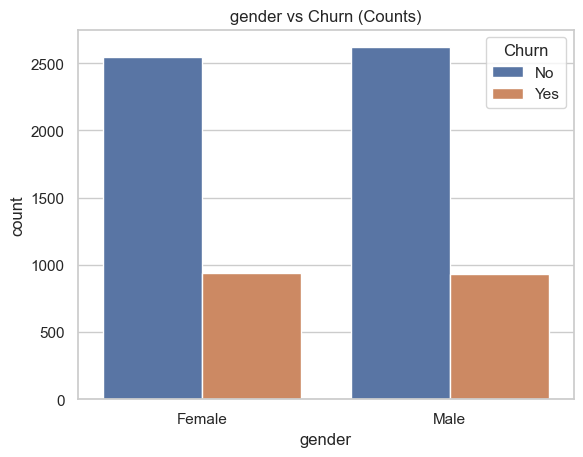

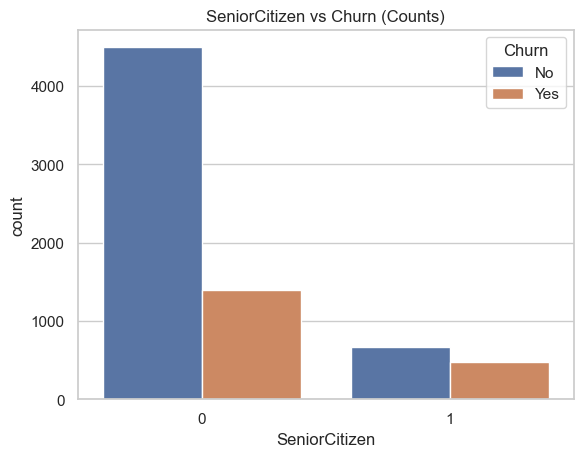

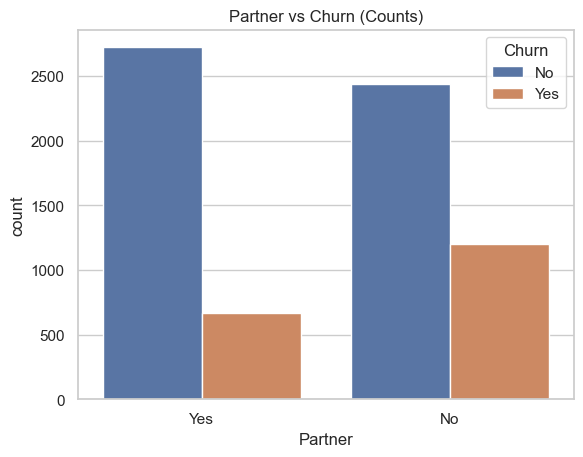

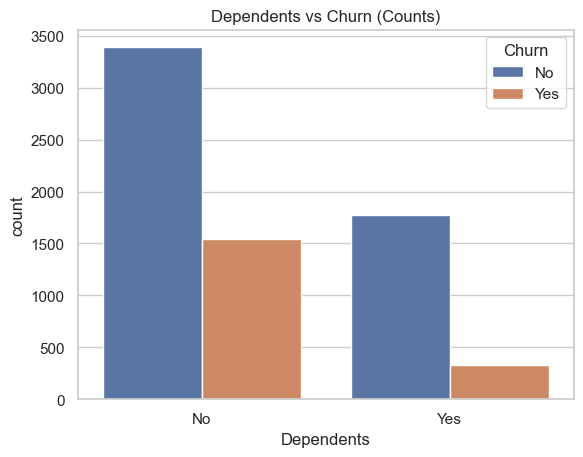

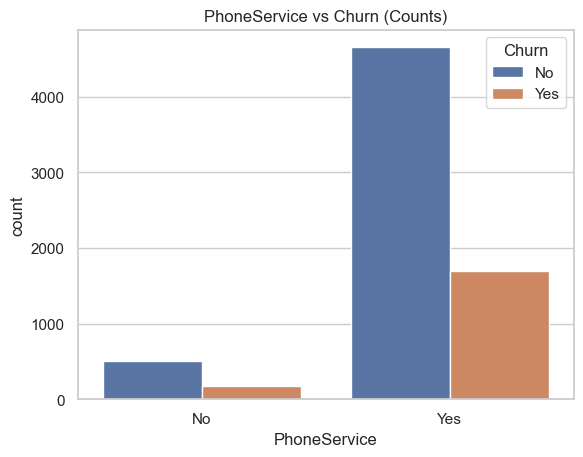

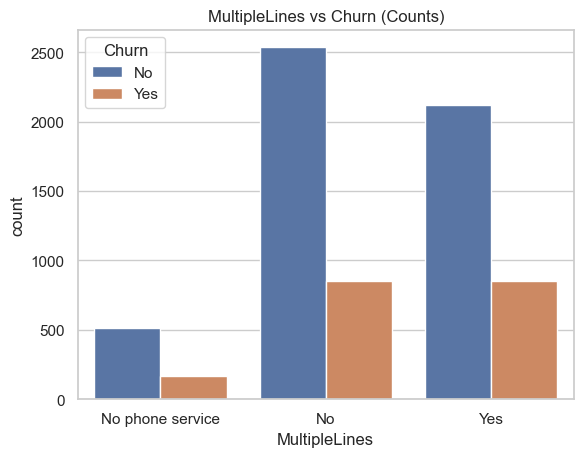

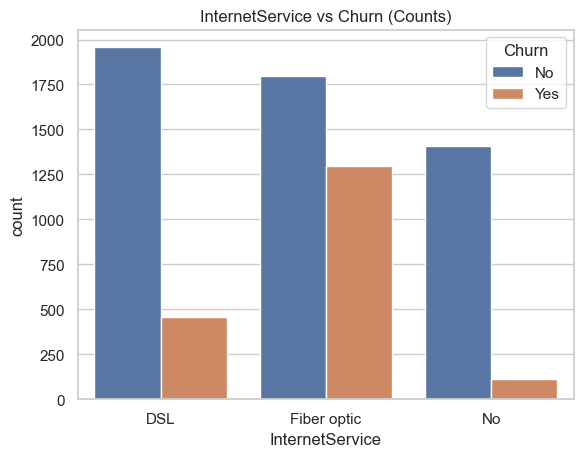

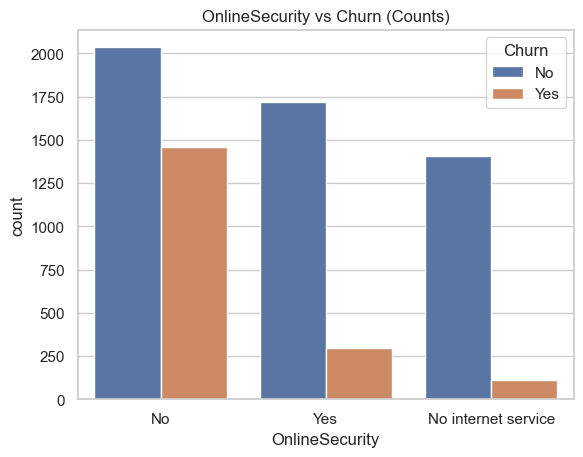

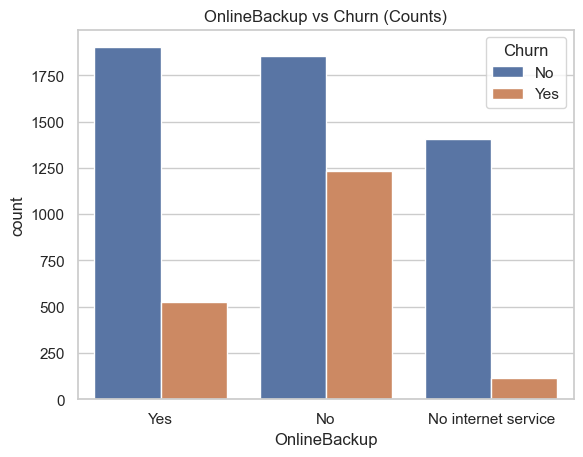

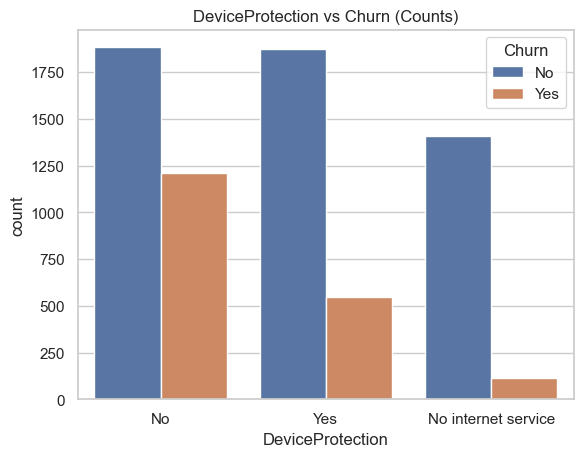

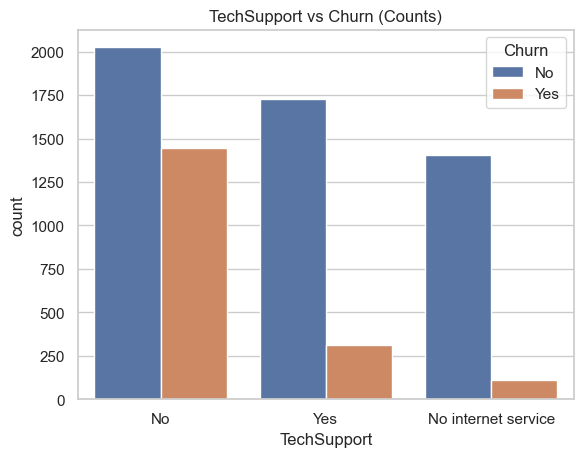

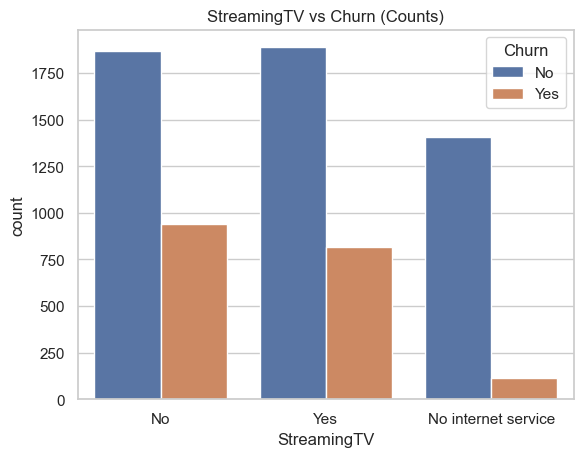

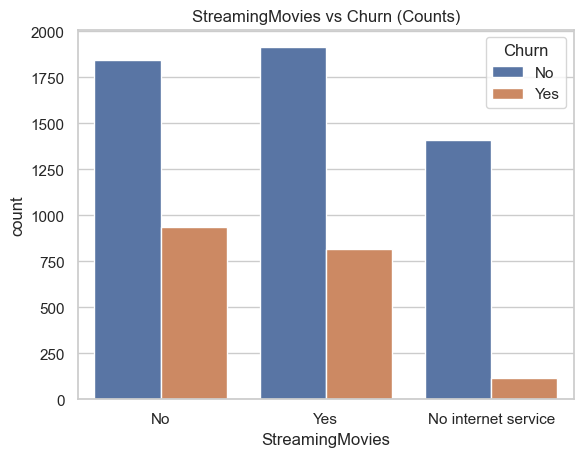

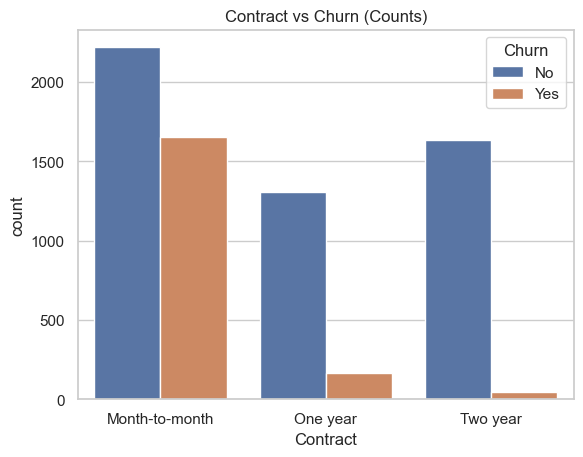

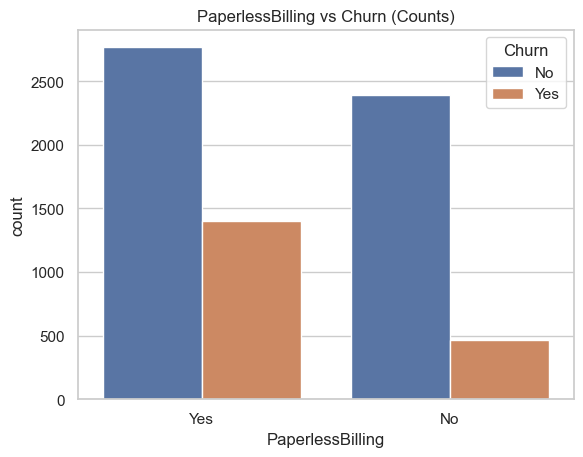

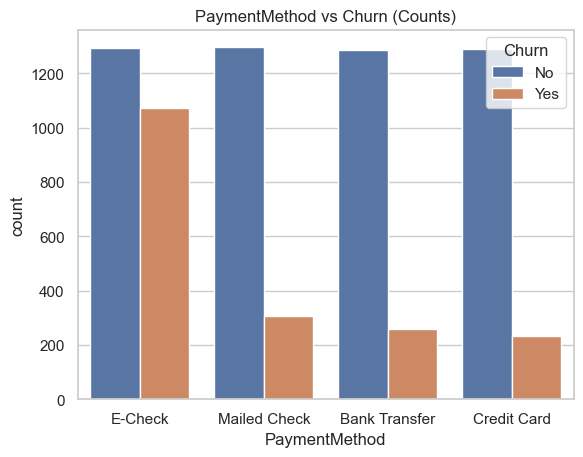

In [24]:
for i in categorical_cols:
    cat_bivariate(df,i)
    print("\n\n")

### Feature Engineering

##### Scaling Numerical Columns

In [25]:
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(df[cols])
scaled_df = pd.DataFrame(scaled_cols, columns=cols, index = df.index)
df[cols] = scaled_df

##### Encoding Categorical Columns 

In [26]:
# Encoding the gender male/female to 1/0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [27]:
# Encoding yes/no columns to 1/0
col_names = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
df[col_names] = df[col_names].apply(lambda col: col.map({
    'Yes': 1,
    'No': 0,
    'No internet service': 0
}))

In [28]:
# One-hot encode remaining categorical features
df = pd.get_dummies(df, columns=['InternetService', 'MultipleLines', 'Contract', 'PaymentMethod'], drop_first=True)

### Saving the Encoded file

In [29]:
df.to_csv("encoded_telco_data.csv", index=False)

### Feature Selection

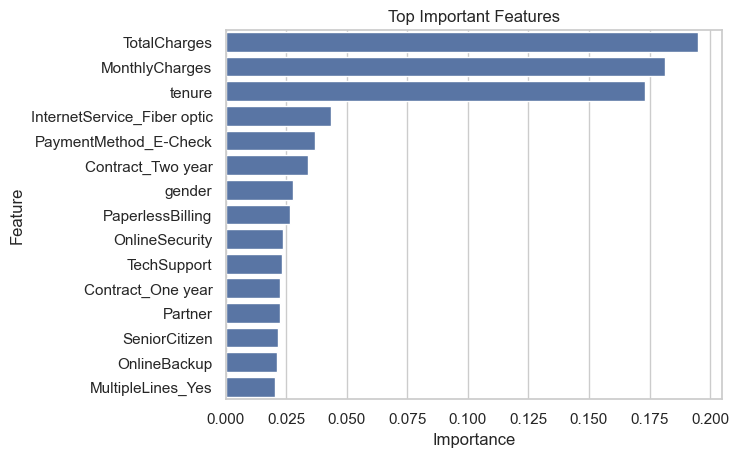

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Spliting features and target
x = df.drop("Churn",axis=1)
y = df["Churn"]

# Training the model
rf = RandomForestClassifier(random_state=42)
rf.fit(x,y)

# Extrating feature importance into a dataframe
imp_df = pd.DataFrame({
    "Feature" : x.columns,
    "Importance" : rf.feature_importances_
})

imp_df = imp_df.sort_values(by="Importance", ascending=False)

# Important Features
imp_df = imp_df[imp_df["Importance"] >= 0.02]

#Visualizing top features
sns.barplot(x = "Importance", y = "Feature", data = imp_df)
plt.title("Top Important Features")
plt.show()

### Model Building : Classification
##### Developing a machine learning model to predict whether a customer is likely to churn, based on their current service usage patterns.

In [31]:
#Features
selected_features = imp_df["Feature"].tolist()
x = df[selected_features]

In [32]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.20, random_state = 42, stratify = y # so that train and test sets have similar proportion of churn
)

In [33]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5625, 15)
X_test shape: (1407, 15)
y_train shape: (5625,)
y_test shape: (1407,)


Using a Random Forest Classifier for this task because 
it is well-suited for binary classification problems like churn prediction.
It handles complex interactions between features, and is relatively robust to overfitting.

In [34]:
#Training the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced',n_estimators=300,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [35]:
#Prediction
y_pred = rf.predict(x_test)

In [36]:
#Evaluating
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[804 229]
 [105 269]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



The Random Forest classifier achieved an accuracy of 76%. While it performed strongly in identifying non-churners (precision: 88%, recall: 78%), it also managed to correctly capture 72% of actual churners, despite the class imbalance. The F1-score for churn prediction is 0.62, indicating a reasonably balanced performance between precision and recall. Overall, the model is suitable for predicting customer churn and can support proactive retention strategies.

### Model Building : Clustering

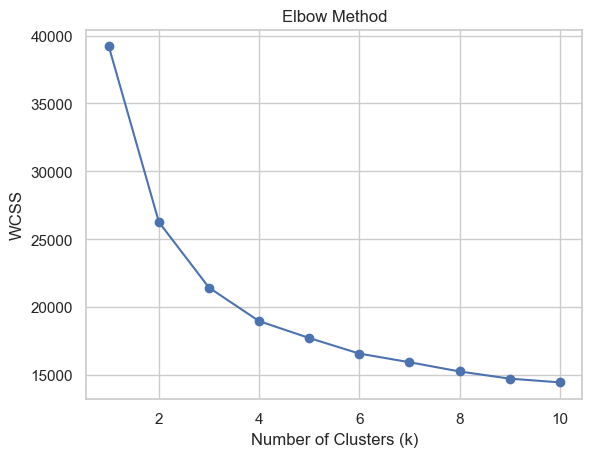

In [37]:
from sklearn.cluster import KMeans

#List to store within-cluster sum of squares
wcss = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

Looking at the graph, the optimal number of clusters is 3.

In [38]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
cluster_labels = kmeans.fit_predict(x)
df['Cluster'] = cluster_labels
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check,Cluster
0,0,0,1,0,-1.28,0,0,1,0,0,0,0,1,-1.16,-0.99,0,False,False,True,False,False,False,False,True,False,1
1,1,0,0,0,0.06,1,1,0,1,0,0,0,0,-0.26,-0.17,0,False,False,False,False,True,False,False,False,True,1
2,1,0,0,0,-1.24,1,1,1,0,0,0,0,1,-0.36,-0.96,1,False,False,False,False,False,False,False,False,True,1
3,1,0,0,0,0.51,0,1,0,1,1,0,0,0,-0.75,-0.20,0,False,False,True,False,True,False,False,False,False,1
4,0,0,0,0,-1.24,1,0,0,0,0,0,0,1,0.20,-0.94,1,True,False,False,False,False,False,False,True,False,2


In [39]:
# Cluster sizes
df['Cluster'].value_counts()

Cluster
1    2822
2    2120
0    2090
Name: count, dtype: int64

##### Cluster 1 is the largest group with 2,822 customers.
##### Cluster 2 and Cluster 0 are similar in size, each with around 2,100 customers.

In [40]:
# Churn rate per Cluster
cluster_churn = df.groupby('Cluster')['Churn'].mean()
print(cluster_churn)

Cluster
0   0.14
1   0.17
2   0.52
Name: Churn, dtype: float64


##### Cluster 2 has a very high churn rate of 52% : more than half of the customers in this group have left the service. This is a high-risk segment that needs immediate attention.

##### Cluster 0 shows strong loyalty with a churn rate of just 14% shows long-term or satisfied customers.

##### Cluster 1 has a moderate churn rate (17%), slightly higher than Cluster 0, and may represent a group that’s starting to show dissatisfaction.

In [41]:
df.groupby('Cluster').agg({
    'tenure': ['mean', 'median'],
    'MonthlyCharges': ['mean', 'median'],
    'TotalCharges': ['mean', 'median'],
    'Churn': 'mean'
})


tenure        MonthlyCharges        TotalCharges        Churn
          mean median           mean median         mean median  mean
Cluster                                                              
0         1.10   1.21           0.83   0.92         1.35   1.30  0.14
1        -0.27  -0.51          -1.06  -1.32        -0.65  -0.75  0.17
2        -0.72  -0.83           0.59   0.53        -0.46  -0.56  0.52

In [42]:
selected_features.append("Churn")

In [43]:
# Cluster-level aggregation
cluster_summary = df.groupby('Cluster')[selected_features].mean().round(2)

cluster_summary

,TotalCharges,MonthlyCharges,tenure,InternetService_Fiber optic,PaymentMethod_E-Check,Contract_Two year,gender,PaperlessBilling,OnlineSecurity,TechSupport,Contract_One year,Partner,SeniorCitizen,OnlineBackup,MultipleLines_Yes,Churn
Cluster,,,,,,,,,,,,,,,,
0,1.35,0.83,1.10,0.63,0.27,0.45,0.50,0.69,0.57,0.58,0.32,0.70,0.20,0.70,0.71,0.14
1,-0.65,-1.06,-0.27,0.00,0.18,0.26,0.52,0.39,0.16,0.14,0.22,0.43,0.07,0.13,0.16,0.17
2,-0.46,0.59,-0.72,0.84,0.60,0.01,0.49,0.77,0.18,0.21,0.08,0.34,0.25,0.28,0.49,0.52


###  Cluster-Based Churn Insights

**Cluster 0 (Loyalists)**  
Churn Rate: **14%**  
Long-tenure, high-paying customers on long-term contracts  
Use support and security services  
Most have partners — mature, stable group  
*Low churn risk – maintain satisfaction, upsell new services*

---

**Cluster 1 (Budget Users)**  
Churn Rate: **17%**  
Low monthly spenders, shorter tenure  
Some on long-term contracts  
Limited support/security usage  
*Medium churn – potential for upsell and retention through value*

---

**Cluster 2 (High Risk)**  
Churn Rate: **52%**  
Short-tenure, high monthly charges, mostly fiber users  
No security/support features, pay via e-check  
*High churn – target with onboarding support, better pricing plans*



In [44]:
#Saving the models for dasboard and deployement purposes
import joblib

joblib.dump(rf, 'churn_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

### Saving the models

In [45]:
import joblib

#Saving the models
joblib.dump(rf, 'churn_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']